# Text analysis with NLTK

NLTK (Natural Language Toolkit) is a popular library for processing big bodies of text in natural\[1] language. It does the job of preparing your texts for further analysis by spliting them into parts or cleaning the "noise" in the text.

\[1]. **Natural Language** is any human language (spoken or written) that was developed for ordinary everyday needs (naturally). This stands in contrast with *constructed* languaes that were developed with a specific intent (like Toki Pona, a minimalist constructed language of only 124 words).

In [55]:
%pip install nltk wordcloud matplotlib -q

Note: you may need to restart the kernel to use updated packages.


#### For some functionalities of nltk you will need to install additional packages. 

[More info](https://www.nltk.org/nltk_data)

In [56]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/mike-
[nltk_data]     pech/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mike-pech/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/mike-
[nltk_data]     pech/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mike-pech/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### Let's open our file

In [57]:
with open("./data/letters-from-a-stoic_lucius-annaeus-seneca.txt", "r", encoding="UTF-8") as file:
    text = file.read()

In [58]:
text

'LETTERS FROM A STOIC\nADVISORY EDITOR: BETTY RADICE\nLUCIUS ANNAEUS SENECA, statesman, philosopher, advocate and man of letters, was\nborn at Cordoba in Spain around 4 B.C. Despite his relatively undistinguished background and\never-recurrent ill health, he rose rapidly to prominence at Rome, pursuing the double career in\nthe courts and political life for which he had been trained. He began also quickly to acquire\ncelebrity as an author of tragedies and of polished essays, moral, literary and scientific.\nSentenced to death by successive emperors (Caligula in A.D. 37 and Claudius in A.D. 41), he\nspent eight years in exile on the island of Corsica, allegedly for an affair with Caligula‟s sister.\nRecalled in A.D. 49, he was made praetor, and was appointed tutor to the boy who was to\nbecome, in A.D. 54, the emperor Nero. On Nero‟s succession Seneca acted for some eight years\nas an unofficial chief minister. The early part of this reign was remembered as a period of sound\nimperial 

#### Tokenize the text

Tokenization process means dividing the whole text into **tokens** — atomic pieces of information. Those can be (but not limited by) words, phrases or sentences. 

By default NLTK uses a `punkt` (or `punkt_tab`) tokenizer that just divides the text using whitespaces and punctuation characters. This makes it uniform for any language (except the ones where word boundaries are not so clear), but may cause some issues with specific tokens like contractions (*mr. Smith* will be two tokens)

In [64]:
tokenized_text = nltk.word_tokenize(text)

In [65]:
# Cut off the bio and the introduction we will not use in the analysis
tokenized_text = tokenized_text[tokenized_text.index("JUDGING"):]
tokenized_text

['JUDGING',
 'from',
 'what',
 'you',
 'tell',
 'me',
 'and',
 'from',
 'what',
 'I',
 'hear',
 ',',
 'I',
 'feel',
 'that',
 'you',
 'show',
 'great',
 'promise',
 '.',
 'You',
 'do',
 'not',
 'tear',
 'from',
 'place',
 'to',
 'place',
 'and',
 'unsettle',
 'yourself',
 'with',
 'one',
 'move',
 'after',
 'another',
 '.',
 'Restlessness',
 'of',
 'that',
 'sort',
 'is',
 'symptomatic',
 'of',
 'a',
 'sick',
 'mind',
 '.',
 'Nothing',
 ',',
 'to',
 'my',
 'way',
 'of',
 'thinking',
 ',',
 'is',
 'a',
 'better',
 'proof',
 'of',
 'a',
 'well',
 'ordered',
 'mind',
 'than',
 'a',
 'man‟s',
 'ability',
 'to',
 'stop',
 'just',
 'where',
 'he',
 'is',
 'and',
 'pass',
 'some',
 'time',
 'in',
 'his',
 'own',
 'company',
 '.',
 'Be',
 'careful',
 ',',
 'however',
 ',',
 'that',
 'there',
 'is',
 'no',
 'element',
 'of',
 'discursiveness',
 'and',
 'desultoriness',
 'about',
 'this',
 'reading',
 'you',
 'refer',
 'to',
 ',',
 'this',
 'reading',
 'of',
 'many',
 'different',
 'authors',
 '

#### Cleaning the tokenized corpus

Before our analysis begins, we must convert all words to lowercase (for ease of counting) and clean the text from "stopwords" — commonly used words that give little to no context to the sentence.

> Examples: the, a, an, on, in, for, our, me, from etc.

In [67]:
from nltk.corpus import stopwords
                      # Stopwords dictionary depends on the language you're using
text_filtered = [word.lower() for word in tokenized_text 
                    if word.lower() not in stopwords.words()]
text_filtered

['judging',
 'hear',
 ',',
 'feel',
 'show',
 'great',
 'promise',
 '.',
 'tear',
 'place',
 'place',
 'unsettle',
 'move',
 '.',
 'restlessness',
 'sort',
 'symptomatic',
 'sick',
 'mind',
 '.',
 ',',
 ',',
 'proof',
 'ordered',
 'mind',
 'man‟s',
 'ability',
 'stop',
 'pass',
 'time',
 'company',
 '.',
 'careful',
 ',',
 ',',
 'element',
 'discursiveness',
 'desultoriness',
 'reading',
 'refer',
 ',',
 'reading',
 'different',
 'authors',
 'books',
 'description',
 '.',
 'extending',
 'stay',
 'writers',
 'genius',
 'unquestionable',
 ',',
 'deriving',
 'constant',
 'nourishment',
 'wish',
 'reading',
 'find',
 'lasting',
 'place',
 'mind',
 '.',
 '.',
 'spend',
 'life',
 'travelling',
 'abroad',
 'plenty',
 'places',
 'find',
 'hospitality',
 'real',
 'friendships',
 '.',
 'case',
 'set',
 'acquiring',
 'intimate',
 'acquaintanceship',
 'great',
 'writer',
 ',',
 'skip',
 ',',
 'paying',
 'flying',
 'visits',
 '.',
 'food',
 'vomited',
 'eaten',
 'assimilated',
 'body',
 ';',
 'hind

#### Not quite — we still need to filter out punctuation

In [68]:
text_filtered = [word for word in text_filtered 
                    if word.isalpha()]     # isalpha() stands for "is alphanumeric"
text_filtered

['judging',
 'hear',
 'feel',
 'show',
 'great',
 'promise',
 'tear',
 'place',
 'place',
 'unsettle',
 'move',
 'restlessness',
 'sort',
 'symptomatic',
 'sick',
 'mind',
 'proof',
 'ordered',
 'mind',
 'ability',
 'stop',
 'pass',
 'time',
 'company',
 'careful',
 'element',
 'discursiveness',
 'desultoriness',
 'reading',
 'refer',
 'reading',
 'different',
 'authors',
 'books',
 'description',
 'extending',
 'stay',
 'writers',
 'genius',
 'unquestionable',
 'deriving',
 'constant',
 'nourishment',
 'wish',
 'reading',
 'find',
 'lasting',
 'place',
 'mind',
 'spend',
 'life',
 'travelling',
 'abroad',
 'plenty',
 'places',
 'find',
 'hospitality',
 'real',
 'friendships',
 'case',
 'set',
 'acquiring',
 'intimate',
 'acquaintanceship',
 'great',
 'writer',
 'skip',
 'paying',
 'flying',
 'visits',
 'food',
 'vomited',
 'eaten',
 'assimilated',
 'body',
 'hinders',
 'cure',
 'frequent',
 'changes',
 'treatment',
 'wound',
 'heal',
 'made',
 'subject',
 'experiments',
 'different',


In [70]:
stop = stopwords.words()

# And this dicitonary is just a list, so you can add more stopwords by just appending
stop.append(["letter"])
                      
text_filtered = [word.lower() for word in text_filtered 
                    if word.lower() not in stop]
text_filtered

['judging',
 'hear',
 'feel',
 'show',
 'great',
 'promise',
 'tear',
 'place',
 'place',
 'unsettle',
 'move',
 'restlessness',
 'sort',
 'symptomatic',
 'sick',
 'mind',
 'proof',
 'ordered',
 'mind',
 'ability',
 'stop',
 'pass',
 'time',
 'company',
 'careful',
 'element',
 'discursiveness',
 'desultoriness',
 'reading',
 'refer',
 'reading',
 'different',
 'authors',
 'books',
 'description',
 'extending',
 'stay',
 'writers',
 'genius',
 'unquestionable',
 'deriving',
 'constant',
 'nourishment',
 'wish',
 'reading',
 'find',
 'lasting',
 'place',
 'mind',
 'spend',
 'life',
 'travelling',
 'abroad',
 'plenty',
 'places',
 'find',
 'hospitality',
 'real',
 'friendships',
 'case',
 'set',
 'acquiring',
 'intimate',
 'acquaintanceship',
 'great',
 'writer',
 'skip',
 'paying',
 'flying',
 'visits',
 'food',
 'vomited',
 'eaten',
 'assimilated',
 'body',
 'hinders',
 'cure',
 'frequent',
 'changes',
 'treatment',
 'wound',
 'heal',
 'made',
 'subject',
 'experiments',
 'different',


## Text analysis part

First off, **wordcloud** — a very intuitive format of data representation that scatters words depending on their frequency in the text.

Requires the text as a whole single string, so we join it using `" ".join(text)`

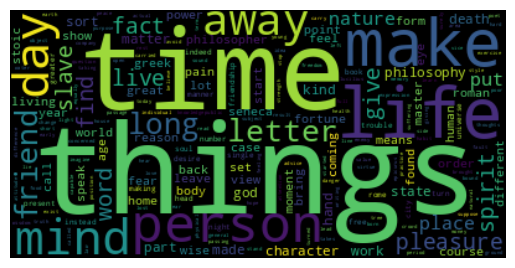

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud_doc = WordCloud().generate(" ".join(text_filtered))

# Technical settings
plt.imshow(wordcloud_doc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Analyzing morphs with NLTK

`nltk` also has a powerful part of speech tagger that parses a list of tokens and returns a list of tuples in `('word', 'part_of_speech')` format

In [73]:
from nltk.tag import pos_tag

pos_tag(["time"])

[('time', 'NN')]

In [77]:
from nltk.tag import pos_tag

pos_tag(["time", "has", "come"])

[('time', 'NN'), ('has', 'VBZ'), ('come', 'VBN')]

In [17]:
import pymorphy3
ru_morph = pymorphy3.MorphAnalyzer(lang="ru")

ru_morph.parse("господин")

[Parse(word='господин', tag=OpencorporaTag('NOUN,anim,masc sing,nomn'), normal_form='господин', score=1.0, methods_stack=((DictionaryAnalyzer(), 'господин', 1257, 0),))]

##### ...or rather a list of several different parses of various meanings of the word

In [40]:
ru_morph.parse("точно")

[Parse(word='точно', tag=OpencorporaTag('ADVB'), normal_form='точно', score=0.5, methods_stack=((DictionaryAnalyzer(), 'точно', 3, 0),)),
 Parse(word='точно', tag=OpencorporaTag('CONJ'), normal_form='точно', score=0.25, methods_stack=((DictionaryAnalyzer(), 'точно', 20, 0),)),
 Parse(word='точно', tag=OpencorporaTag('ADJS,Qual neut,sing'), normal_form='точный', score=0.25, methods_stack=((DictionaryAnalyzer(), 'точно', 223, 56),))]

#### Like this we can make a chart with the quantity of various parts of speech

In [79]:
parts_of_speech = {}     # Empty dictionary for part of speech counts

pos_list = [word_pos[1] for word_pos in pos_tag(text_filtered)]  # Analyse

for pos in pos_list:

    if pos not in parts_of_speech.keys():    # Create a record if there was none
        parts_of_speech.update({pos: 0})
    else:
        parts_of_speech[pos] += 1            # Increment a record if exists

parts_of_speech

{'VBG': 1558,
 'JJ': 5069,
 'NN': 9190,
 'RB': 1064,
 'VBD': 1418,
 'VB': 220,
 'VBP': 1413,
 'NNS': 3182,
 'VBN': 675,
 'VBZ': 541,
 'JJS': 90,
 'IN': 132,
 'RP': 44,
 'CD': 13,
 'JJR': 111,
 'RBR': 47,
 'FW': 12,
 'CC': 10,
 'NNP': 25,
 'WDT': 3,
 'PRP': 8,
 'WRB': 1,
 'DT': 2,
 'WP': 1,
 'RBS': 0}

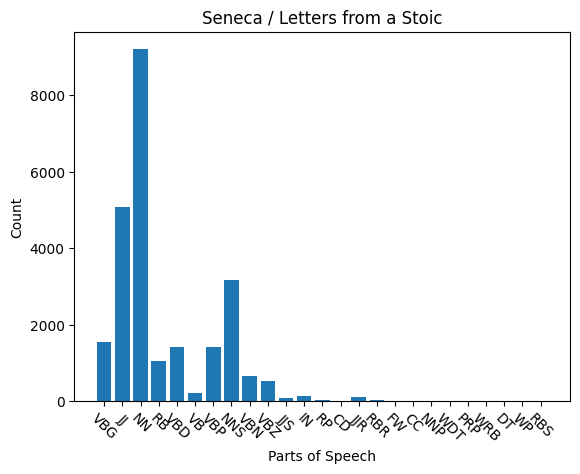

In [86]:
fig, ax = plt.subplots()

ax.bar(
    parts_of_speech.keys(),
    parts_of_speech.values(), 
)

ax.set_xlabel("Parts of Speech")
ax.set_ylabel("Count")
ax.set_title("Seneca / Letters from a Stoic")
ax.tick_params(axis='x', labelrotation=-45)